# SVM
Support Vector Machine (SVM) is a relatively simple Supervised Machine Learning Algorithm used for classification and/or regression. It is more preferred for classification but is sometimes very useful for regression as well. Basically, SVM finds a hyper-plane that creates a boundary between the types of data. In 2-dimensional space, this hyper-plane is nothing but a line. In SVM, we plot each data item in the dataset in an N-dimensional space, where N is the number of features/attributes in the data. Next, find the optimal hyperplane to separate the data. So by this, you must have understood that inherently, SVM can only perform binary classification (i.e., choose between two classes). However, there are various techniques to use for multi-class problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class SVM:
    def __init__(self, lr = 0.001, λ = 0.01,n = 1000):
        self.lr = lr
        self.λ = λ
        self.n = n
        self.w = None
        self.b = None

    def predict(self, X,):
        return np.sign(np.dot(X, self.w) - self.b)

    def fit(self, X, y):
        np.where(y <= 0,-1,1)
        n_samples,n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n):
            for idx,xi in enumerate(X):
                condition = y[idx] * (np.dot(xi,self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2*self.λ*self.w)
                else :
                    self.w -= self.lr * (2*self.λ*self.w - np.dot(xi,y[idx]))

    def score(self,test_X, test_y):
        correct = 0
        for i in range(test_X):
            if self.predict(test_X[i]) == test_y[i]:
                correct += 1
        return (correct/len(test_X)) * 100

[0.61505381 0.16095805] 0


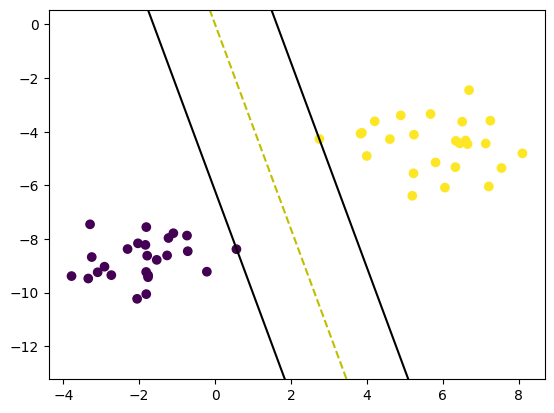

In [6]:
# Imports
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs(
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)
y = np.where(y == 0, -1, 1)

clf = SVM()
clf.fit(X, y)
# predictions = clf.predict(X)

print(clf.w, clf.b)

def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

    x0_1 = np.amin(X[:, 0])
    x0_2 = np.amax(X[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()
